In [1]:
#importing the required libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset and preprocessing

df=pd.read_csv("Heart.csv")
df.head()  #showing the first five records

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df[:][:]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.shape

(918, 12)

In [5]:
#getting some more info and basic overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isna().sum()  #checking for missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
df["HeartDisease"].value_counts()  #checking the distribution of the target variable

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Heart Disease:
1------> heart_patient
0------> NOT heart_patient

In [10]:
#df["ST_Slope"].value_counts()
df["ChestPainType"].value_counts()
#df["RestingECG"].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [11]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [12]:
df["ST_Slope"]=df["ST_Slope"].map({"Flat":0, "Up":1, "Down":-1})
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,1,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,0,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,0,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,0,1


In [13]:
df["Sex"]=df["Sex"].map({"M":0, "F":1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,N,0.0,1,0
1,49,1,NAP,160,180,0,Normal,156,N,1.0,0,1
2,37,0,ATA,130,283,0,ST,98,N,0.0,1,0
3,48,1,ASY,138,214,0,Normal,108,Y,1.5,0,1
4,54,0,NAP,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,N,1.2,0,1
914,68,0,ASY,144,193,1,Normal,141,N,3.4,0,1
915,57,0,ASY,130,131,0,Normal,115,Y,1.2,0,1
916,57,1,ATA,130,236,0,LVH,174,N,0.0,0,1


In [14]:
df["ChestPainType"]=df["ChestPainType"].map({"ATA":0, "NAP":1,"TA":2, "ASY":-1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,Normal,172,N,0.0,1,0
1,49,1,1,160,180,0,Normal,156,N,1.0,0,1
2,37,0,0,130,283,0,ST,98,N,0.0,1,0
3,48,1,-1,138,214,0,Normal,108,Y,1.5,0,1
4,54,0,1,150,195,0,Normal,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,Normal,132,N,1.2,0,1
914,68,0,-1,144,193,1,Normal,141,N,3.4,0,1
915,57,0,-1,130,131,0,Normal,115,Y,1.2,0,1
916,57,1,0,130,236,0,LVH,174,N,0.0,0,1


In [15]:
df["RestingECG"]=df["RestingECG"].map({"Normal":0, "LVH":1, "ST":-1}) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,N,0.0,1,0
1,49,1,1,160,180,0,0,156,N,1.0,0,1
2,37,0,0,130,283,0,-1,98,N,0.0,1,0
3,48,1,-1,138,214,0,0,108,Y,1.5,0,1
4,54,0,1,150,195,0,0,122,N,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,N,1.2,0,1
914,68,0,-1,144,193,1,0,141,N,3.4,0,1
915,57,0,-1,130,131,0,0,115,Y,1.2,0,1
916,57,1,0,130,236,0,1,174,N,0.0,0,1


In [16]:
df["ExerciseAngina"]=df["ExerciseAngina"].map({"N":0, "Y":1})

In [17]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,0,130,283,0,-1,98,0,0.0,1,0
3,48,1,-1,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,0,1.2,0,1
914,68,0,-1,144,193,1,0,141,0,3.4,0,1
915,57,0,-1,130,131,0,0,115,1,1.2,0,1
916,57,1,0,130,236,0,1,174,0,0.0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [19]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [20]:
#Splitting the features and target

X=df.drop(columns=["HeartDisease"],axis=1)
Y=df["HeartDisease"]

In [21]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,0,140,289,0,0,172,0,0.0,1
1,49,1,1,160,180,0,0,156,0,1.0,0
2,37,0,0,130,283,0,-1,98,0,0.0,1
3,48,1,-1,138,214,0,0,108,1,1.5,0
4,54,0,1,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,0,132,0,1.2,0
914,68,0,-1,144,193,1,0,141,0,3.4,0
915,57,0,-1,130,131,0,0,115,1,1.2,0
916,57,1,0,130,236,0,1,174,0,0.0,0


In [22]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [23]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for i in X.columns: 
#     if X[i].dtype=='object': 
#         X[i]=le.fit_transform(X[i])

In [24]:
#Splitting the data into Training data and Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42, stratify=Y)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(918, 11) (615, 11) (303, 11)


In [26]:
print(Y.shape, Y_train.shape, Y_test.shape)

(918,) (615,) (303,)


In [27]:
# from sklearn.preprocessing import StandardScaler
# scale=StandardScaler()
# X_train_scaled= scale.fit_transform(X_train)
# X_test_scaled= scale.transform(X_test)

**MODEL_TRAINING**

In [28]:
my_model=LogisticRegression()

In [29]:
# from sklearn.model_selection import GridSearchCV
# parameter={'penalty':['l1','l2','elasticnet'], 'C':[1,2,3,4,5,6,7,10,20,30,40,50], 'max_iter':[100,200,300,400]}

In [30]:
# my_final_model=GridSearchCV(my_model, param_grid=parameter, scoring='accuracy', cv=5)

In [31]:
my_model.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# print(my_final_model.best_score_)

**MODEL_EVALUATION**

In [33]:
#checking the aaccuracy_score on the training data 

X_train_prediction=my_model.predict(X_train)
train_data_acc=accuracy_score(X_train_prediction, Y_train)
print("Accuracy on the training-data is : ",train_data_acc)

Accuracy on the training-data is :  0.848780487804878


In [34]:
#checking the aaccuracy_score on the testing data 

X_test_prediction=my_model.predict(X_test)
test_data_acc=accuracy_score(X_test_prediction, Y_test)
print("Accuracy on the test-data is : ",test_data_acc)

Accuracy on the test-data is :  0.8646864686468647


**Building the PREDICTIVE_SYSTEM**

In [35]:
input_data=eval(input("\nEnter the details of the person in list: "))
for i in range(11): 
    if input_data[i]=='M':
        input_data[i]=0
    if input_data[i]=='F':
        input_data[i]=1
    if input_data[i]=='ATA': 
        input_data[i]=0
    if input_data[i]=='NAP': 
        input_data[i]=1
    if input_data[i]=='TA': 
        input_data[i]=2
    if input_data[i]=='ASY': 
        input_data[i]=-1 
    if input_data[i]=='Normal': 
        input_data[i]=0
    if input_data[i]=='LVH': 
        input_data[i]=1 
    if input_data[i]=='ST': 
        input_data[i]=-1 
    if input_data[i]=='N': 
        input_data[i]=0
    if input_data[i]=='Y': 
        input_data[i]=1
    if input_data[i]=='Flat': 
        input_data[i]=0
    if input_data[i]=='Up': 
        input_data[i]=1 
    if input_data[i]=='Down': 
        input_data[i]=-1

input_data_array=np.asarray(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=my_model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1: 
    print("\nill heart")
else:
    print("\nHealthy heart")


Enter the details of the person in list:  


SyntaxError: invalid syntax (<string>, line 0)

In [36]:
#classification_report 

from sklearn.metrics import classification_report

In [37]:
print(classification_report(X_test_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       132
           1       0.89      0.87      0.88       171

    accuracy                           0.86       303
   macro avg       0.86      0.86      0.86       303
weighted avg       0.87      0.86      0.86       303



In [38]:
#including confusion_matrix 
#method-1: using scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

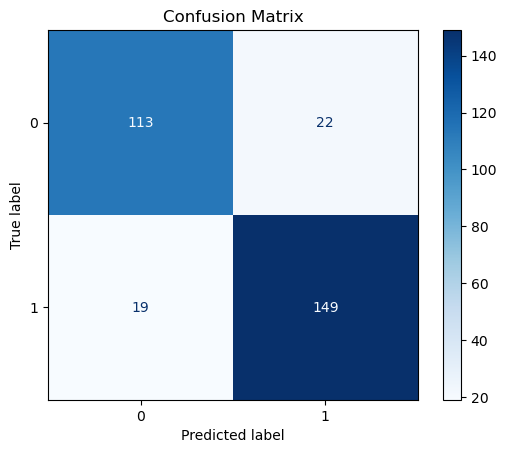

In [39]:
cm = confusion_matrix(Y_test, X_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=my_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

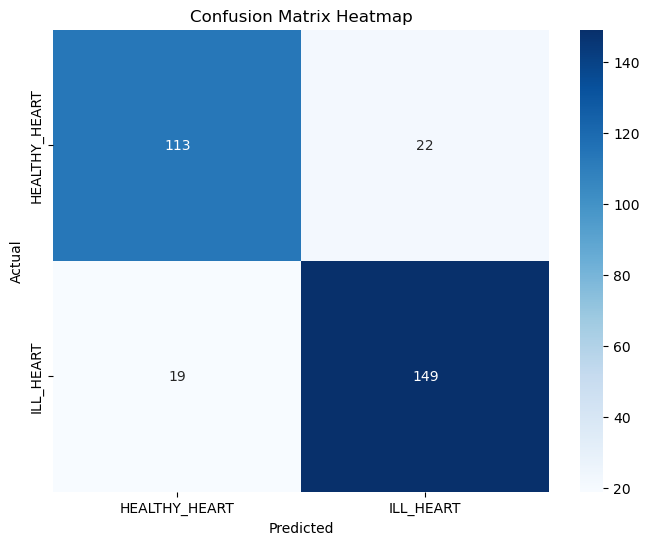

In [40]:
#including confusion_matrix 
#method-2: using seaborn heatmap

cm = confusion_matrix(Y_test, X_test_prediction)
class_labels = ['HEALTHY_HEART', 'ILL_HEART'] # Define your labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Heatmap')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

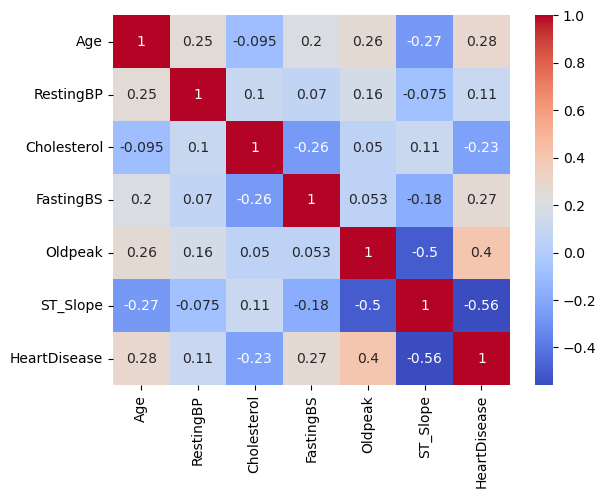

In [41]:
sns.heatmap(df[["Age","RestingBP","Cholesterol","FastingBS","Oldpeak","ST_Slope","HeartDisease"]].corr(), annot=True, cmap='coolwarm')
plt.show()

In [42]:
sns.scatterplot(df,x='Age', y='HeartDisease')

<Axes: xlabel='Age', ylabel='HeartDisease'>

In [43]:
sns.scatterplot(df,x='Oldpeak', y='HeartDisease')

<Axes: xlabel='Age', ylabel='HeartDisease'>

**SAVING THE TRAINED MODEL**

In [44]:
import pickle

In [45]:
filename = 'model.pkl'
pickle.dump(my_model,open(filename,'wb'))

In [46]:
#loading the saved model 

loaded_model=pickle.load(open('model.pkl','rb'))

In [49]:
input_data=eval(input("\nEnter the details of the person in list: "))
for i in range(11): 
    if input_data[i]=='M':
        input_data[i]=0
    if input_data[i]=='F':
        input_data[i]=1
    if input_data[i]=='ATA': 
        input_data[i]=0
    if input_data[i]=='NAP': 
        input_data[i]=1
    if input_data[i]=='TA': 
        input_data[i]=2
    if input_data[i]=='ASY': 
        input_data[i]=-1 
    if input_data[i]=='Normal': 
        input_data[i]=0
    if input_data[i]=='LVH': 
        input_data[i]=1 
    if input_data[i]=='ST': 
        input_data[i]=-1 
    if input_data[i]=='N': 
        input_data[i]=0
    if input_data[i]=='Y': 
        input_data[i]=1
    if input_data[i]=='Flat': 
        input_data[i]=0
    if input_data[i]=='Up': 
        input_data[i]=1 
    if input_data[i]=='Down': 
        input_data[i]=-1

input_data_array=np.asarray(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)
if prediction[0]==1: 
    print("\nill heart")
else:
    print("\nHealthy heart")


Enter the details of the person in list:  [40,'M','ATA',140,289,0,'Normal',172,'N',0.0,'Up']


[0]

Healthy heart


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')